# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 2 - Linear Regression / Logistic Regression </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/MLF/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1kutJ21bQ5N-vkiCnaqVSPgFIrVxuakoy?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

Outline 

- [Linear Regression](#Linear-Regression)
  - [Create Fake Data](#Create-Fake-Data)
  - [Solve the Linear Regression problem using Normal equation](#Solve-the-Linear-Regression-problem-using-Normal-equation)
  - [Solve the Linear Regression problem using Gradient Descent in numpy](#Solve-the-Linear-Regression-problem-using-Gradient-Descent-in-numpy)
- [Logistic Regression](#Logistic-Regression)
  - [Load the Iris Dataset](#Load-the-Iris-Dataset)
  - [Gradient Descent in numpy](#Gradient-Descent-in-numpy)
- [Summary](#Summary)

# Linear Regression


In [2]:
# Import Modules
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # to plot data
#plt.style.use('dark_background') # to adapt the colors to a dark background

## Create Fake Data


---
<font color=green>Q1:</font>
<br><font color='green'>
Let's create a fake dataset. We try to predict the salary of an employee based on the number of years of experience.
</font>

---

In [4]:
N = 100 # number of samples
D = 1 # dimensionality of data 

np.random.seed(0) # fix the seed to generate the same samples eveytime we run the cell
# Generate fake X
### Start code ###
X = np.random.randn(N, D)*4 + 20
### End code ###

true_W = 0.5 # first parameter
true_b = 0.7 # second parameter


# Generate fake Y
### Start code ###
Y = X.dot(true_W) + true_b + np.random.randn(N, 1)
### End code ###


---
<font color=green>Q2:</font>
<br><font color='green'>
Plot the fake data
</font>

---

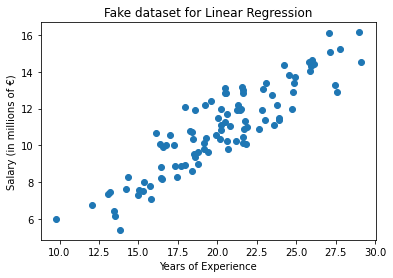

In [9]:
# scatter plot
plt.scatter(X, Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in millions of €)")
plt.title("Fake dataset for Linear Regression")
plt.show()

 

---
<font color=green>Q3:</font>
<br><font color='green'>
Show the best line used to create the fake data
</font>

---

Text(0.5, 1.0, 'The fake data and the true line')

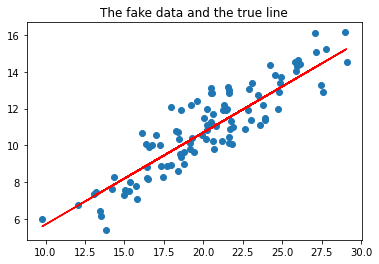

In [19]:
# Predicted target: Y_hat = X true_W + true_b
Y_hat = X.dot(true_W) + true_b 
# scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_hat, c="r")
plt.title("The fake data and the true line")



---
<font color=green>Q4:</font>
<br><font color='green'>
Let's perform the change of variable:
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=11uenRL0GgXIl_4-0Bzi0jcyG_8PVl9Ug"></center>

In [15]:
X.shape
np.repeat(1, N)[:, None].shape # (N, 1) and not (N,)
# concatenate X (N, D) with the matrix of ones of shape (N, 1) ----> (N, D+1)
X_hat = np.concatenate((X, np.repeat(1, N)[:, None]), axis=1)

## Solve the Linear Regression problem using Normal equation

Loss and Gradient expressions:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1t9zKI1ohGwJTzA4ir4De2ypMVO2vdmLQ"></center>

* By setting the gradient to zero. We obtain the following equation, called the **Normal Equation**:
\begin{equation}
\hat{X}^T \hat{X} \hat{w} =  \hat{X}^T Y
\end{equation}

* If $\hat{X}^T \hat{X}$ is invertible, the optimal $\hat{w}^*$  is given by the following equation:

\begin{equation}
\hat{w}^* = (\hat{X}^T \hat{X})^{-1} \hat{X}^T Y
\end{equation}



---
<font color=green>Q5:</font>
<br><font color='green'>
Calculate $\hat{w}^*$ 
</font>

---

In [20]:
W_hat_optimal = np.linalg.inv(X_hat.T.dot(X_hat)).dot(X_hat.T.dot(Y))

In [21]:
W_hat_optimal

array([[0.52867461],
       [0.20166092]])




---
<font color=green>Q6:</font>
<br><font color='green'>
Show the fitted line after solving the normal equation

</font>

---

Text(0.5, 1.0, 'The fake data and the true line')

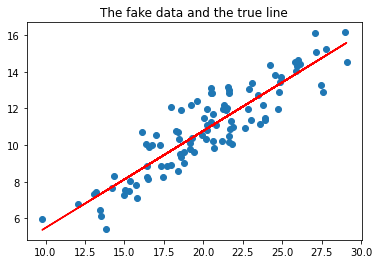

In [23]:
# Predicted target:
Y_hat = X_hat.dot(W_hat_optimal) 
# scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_hat, c="r")
plt.title("The fake data and the true line")

## Solve the Linear Regression problem using Gradient Descent in numpy

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=10YjrbBSmNh910jcnkKiUVccPVQCKFbPU"></center>

 
---
<font color=green>Q7:</font>
<br><font color='green'>
Perform the optimization using gradient descent

</font>

---

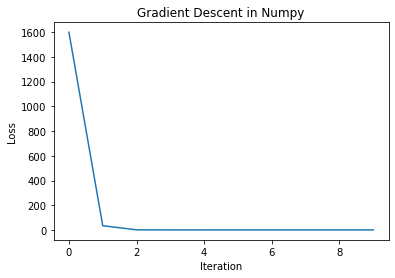

In [27]:
max_iter = 10
eta = 0.001

losses = []
W_hat = np.random.randn(D+1, 1)
for i in range(max_iter):
    P = X_hat.dot(W_hat)
    loss = 1 / N * ((Y - P).T.dot(Y - P))
    grad_W_hat = (2 / N) * (X_hat.T.dot(P) - X_hat.T.dot(Y))
    W_hat -= eta * grad_W_hat
    losses.append(float(loss))

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent in Numpy")
plt.show()

 

---
<font color=green>Q8:</font>
<br><font color='green'>
Plot the losses
</font>

---

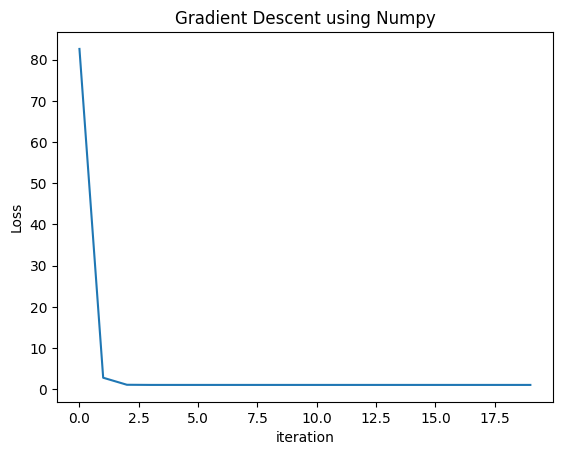

In [ ]:
# plot losses  





---
<font color=green>Q9:</font>
<br><font color='green'>
Show the fitted line after the gradient descent algorithm
</font>

---

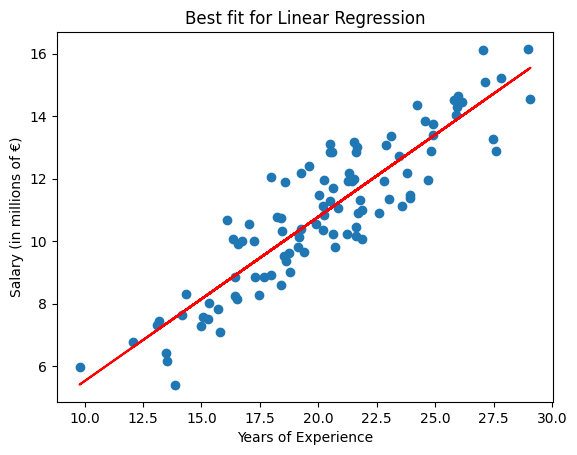

In [ ]:
# Predicted target:


# Logistic Regression 

In [ ]:
# Import Modules
from sklearn import datasets # import iris dataset from sklearn
from scipy.special import expit # for the sigmoid (called expit) function

## Load Iris Dataset

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=19RdLMhodreCvIOGELgcVcPrxl2AYSnKx"></center>



---
<font color=green>Q10:</font>
<br><font color='green'>
 Load the Iris dataset 
</font>

---

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
Y = iris.target

# keep only the rows for which Y in {0, 1}
X = X[Y != 2]
Y = Y[Y != 2]



---
<font color=green>Q11:</font>
<br><font color='green'>
Plot data
</font>

---

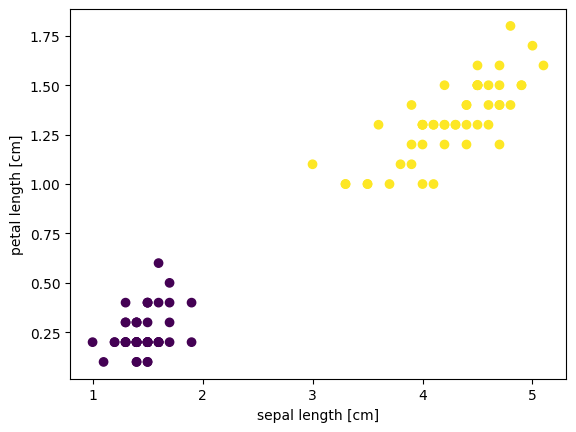

In [ ]:
# plot Data






---
<font color=green>Q12:</font>
<br><font color='green'>
Print the shape of data
</font>

---

In [ ]:
# Shape of data


## Gradient Descent in numpy

Loss and Gradient expressions:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1BLIo0z8ZPG0lxBh6qVgo2LSIlLhdEdq6"></center>

Useful Matrices to compute the gradient:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1CD8-Ob1MnCjKFd-Kr5-9l7cWa1Wf2w06"></center>

* To compute the gradient of $J$ with respect to $w$, we can use the columns $R_1, \dots, R_N$ of the final matrix $\hat{\epsilon} X$.
* The gradient can then be expressed as follows: 
\begin{equation}
\nabla_w J(w) = \frac{1}{N} \sum_{i=1}^N R_i
\end{equation}
* We can then apply the Gradient Descent Algorithm

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=104lZd77kIuSfDbH4o3tM50cRmwmqN_B4"></center>


---
<font color=green>Q13:</font>
<br><font color='green'>
Define the hyperparameters of the Gradient Descent Algorithm
</font>

---

In [1]:
max_iter = 1000 # number of iterations of gradient descent
eta = 0.01 # learning rate for gradient descent 




---
<font color=green>Q14:</font>
<br><font color='green'>
Gradient Descent Algorithm
</font>

---



---
<font color=green>Q15:</font>
<br><font color='green'>
Plot the losses
</font>

---


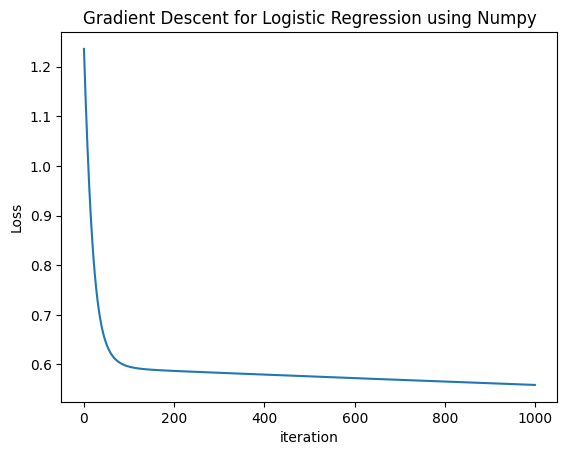

# Wrap-up

In this lecture you learned how to learn the parameters of a model by applying the gradient descent algorithm.


*   Learning the parameters of the Linear Regression Model
*   Learning the parameters of the Logistic Regression Model



### Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk